<a href="https://colab.research.google.com/github/Romil112/EDA/blob/main/RomilGupta_TIET_Celebal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analysis of top songs of top 50 artists of India

```



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/SingerAndSongs.csv')
df
df.rename(columns={'Song name':'name'},inplace=True)
df1=df.drop_duplicates(subset=["name"])
#df.drop("Unnamed: 0",axis=1,inplace=True)
df1.head()


,Singer,acousticness,danceability,energy,id,instrumentalness,key,liveness,loudness,mode,name,speechiness,tempo,track_href,valence
0,Aastha Gill,0.48500,0.770,0.824,39ujbBjTwwqUFySaCYDMMT,0.000000,1,0.3180,-6.491,0,Proper Patola,0.0851,172.006,https://api.spotify.com/v1/tracks/39ujbBjTwwqU...,0.490
1,Aastha Gill,0.14300,0.825,0.666,5cjVsWqIkBQC7acTRhL0RO,0.000003,4,0.2370,-4.847,0,Kamariya,0.0554,96.987,https://api.spotify.com/v1/tracks/5cjVsWqIkBQC...,0.763
2,Aastha Gill,0.23600,0.663,0.551,3XYvdqcZrTmRntFDDbJkJd,0.000036,3,0.0923,-8.272,0,Buzz (feat. Badshah),0.1090,113.314,https://api.spotify.com/v1/tracks/3XYvdqcZrTmR...,0.601
3,Aastha Gill,0.00323,0.919,0.571,46GBoFCdFZZSjuGaZjZmGv,0.001680,5,0.1030,-7.175,0,Saara India,0.0687,105.007,https://api.spotify.com/v1/tracks/46GBoFCdFZZS...,0.231
4,Aastha Gill,0.12900,0.867,0.720,6VwVEIiCro1EMyh9B6Om3v,0.000000,9,0.2280,-5.188,0,Drunk n High,0.0619,104.974,https://api.spotify.com/v1/tracks/6VwVEIiCro1E...,0.755


In [ ]:
df1.isna().sum()

Singer              0
acousticness        0
danceability        0
energy              0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                1
speechiness         0
tempo               0
track_href          0
valence             0
dtype: int64

In [ ]:
newdf=df1.dropna()
newdf.isna().sum()

Singer              0
acousticness        0
danceability        0
energy              0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
speechiness         0
tempo               0
track_href          0
valence             0
dtype: int64

In [ ]:
newdf.info()
newdf.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1850 entries, 0 to 2229
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Singer            1850 non-null   object 
 1   acousticness      1850 non-null   float64
 2   danceability      1850 non-null   float64
 3   energy            1850 non-null   float64
 4   id                1850 non-null   object 
 5   instrumentalness  1850 non-null   float64
 6   key               1850 non-null   int64  
 7   liveness          1850 non-null   float64
 8   loudness          1850 non-null   float64
 9   mode              1850 non-null   int64  
 10  name              1850 non-null   object 
 11  speechiness       1850 non-null   float64
 12  tempo             1850 non-null   float64
 13  track_href        1850 non-null   object 
 14  valence           1850 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 231.2+ KB


(1850, 15)

In [ ]:

newdf.describe()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
count,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000
mean,0.409736,0.609891,0.650325,0.012616,5.368108,0.182454,-7.344483,0.572432,0.076715,115.931811,0.552704
std,0.297888,0.157909,0.189201,0.081055,3.496295,0.142256,2.920065,0.494859,0.073006,26.735893,0.218228
min,0.000266,0.156000,0.103000,0.000000,0.000000,0.022200,-20.090000,0.000000,0.023200,55.832000,0.039400
25%,0.132000,0.500250,0.512250,0.000000,2.000000,0.095300,-8.920750,0.000000,0.033900,95.967000,0.374000
50%,0.366500,0.621000,0.664000,0.000006,6.000000,0.125000,-7.000000,1.000000,0.047800,110.034000,0.557000
75%,0.667750,0.732000,0.806000,0.000265,8.000000,0.234000,-5.396000,1.000000,0.084400,131.154750,0.727000
max,0.994000,0.971000,0.988000,0.967000,11.000000,0.972000,0.003000,1.000000,0.684000,214.016000,0.970000


  Analysis of data

In [ ]:
#Top 10 artists
toppartist=newdf.groupby("Singer").count().sort_values(by="name",ascending=False)["name"][:10]
toppartist

Singer
Arijit Singh       79
Asha Bhosle        69
Badshah            52
Emiway bantai      50
Amit Trivedi       50
Mahendra Kapoor    50
AR Rahman          49
Ankit Tiwari       49
Usha Uthup         49
Armaan Malik       48
Name: name, dtype: int64

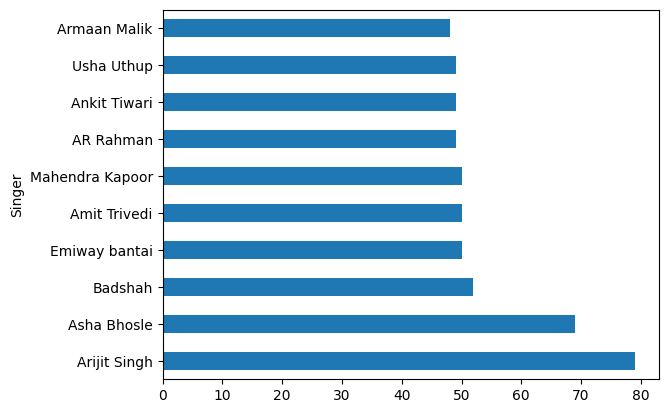

In [ ]:
#Bar plot for top artists
toppartist.plot.barh()
plt.show()

In [ ]:
#Top 10 Loudest tracks
mostloud=newdf[["loudness","name","Singer"]].sort_values(by="loudness",ascending=True)[:10]
mostloud

,loudness,name,Singer
1200,-20.090,Beete Huye Lamhon Ki Kasak,Mahendra Kapoor
173,-19.043,Aanewala Kal Ek Sapna - Anu Malik Version,Anu Malik
1916,-17.850,Nahin Saamne Tu,Sukhwinder Singh
749,-17.841,Mazak Hai Kya,Emiway bantai
1725,-17.405,Yemi Cheyamanduve,Shankar Mahadevan
193,-16.931,Dekh Le - Munnabhai MBBS / Soundtrack Version,Anu Malik
1165,-16.743,Thodi Si Zamin Thoda Aasman,Lata Mangeshwar
1152,-16.491,Bahon Mein Chale Aao,Lata Mangeshwar
1102,-16.345,Tere Dar Par Sanam - Male Version,Kumar Sanu
227,-16.269,Ishq Bina,AR Rahman


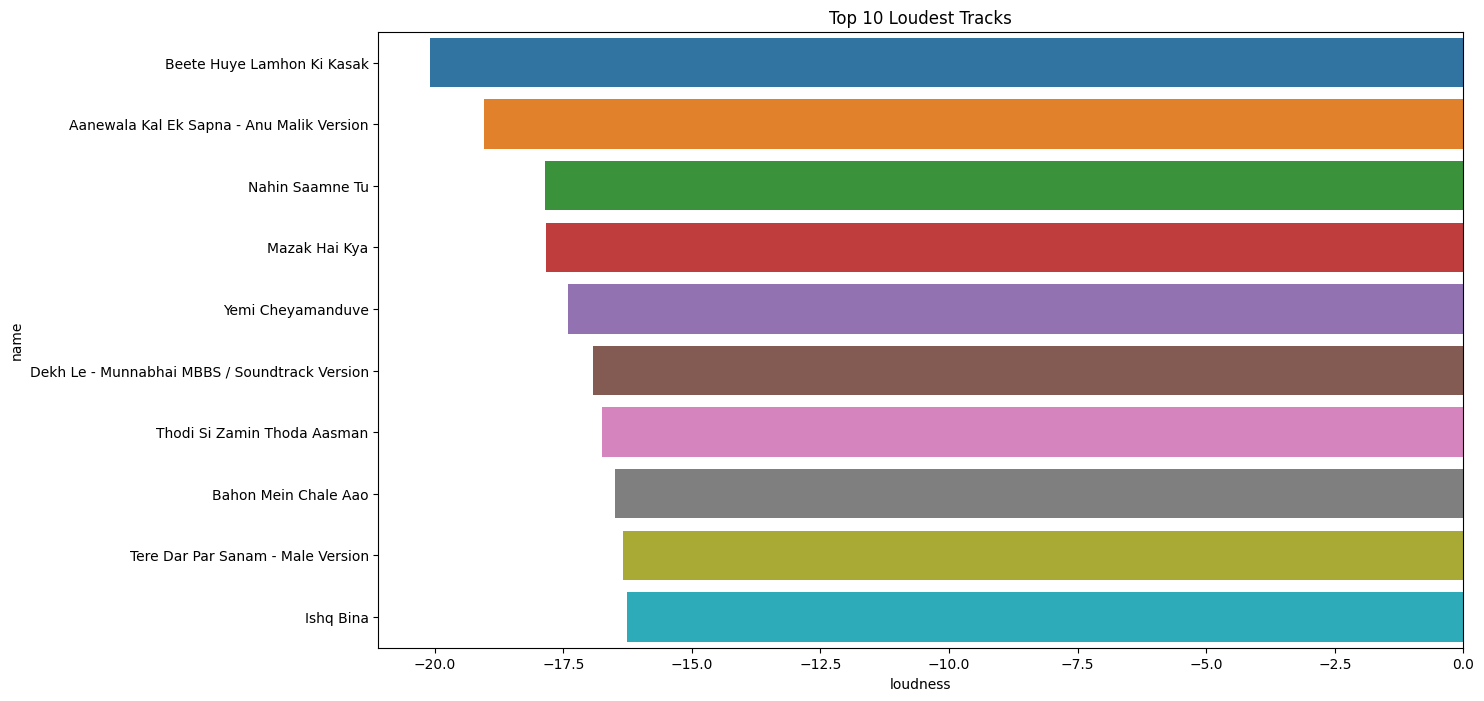

In [ ]:
plt.figure(figsize=(14,8))
sns.barplot(x="loudness",y="name",data=mostloud)
plt.title("Top 10 Loudest Tracks")
plt.show()

In [ ]:
#Top 8 Danceable songs
mostdance=newdf[["danceability","name","Singer"]].sort_values(by="danceability",ascending=False)[:8]
mostdance

,danceability,name,Singer
545,0.971,Aao Kabhi Haveli Pe,Badshah
22,0.959,Dj Waley Babu (feat. Aastha Gill),Aastha Gill
552,0.955,Genda Phool (feat. Payal Dev),Badshah
536,0.943,"Sab Sahi Hai Bro - Inspired by ""Aladdin""",Badshah
731,0.940,Roots (feat. Raja Kumari),Divine
1261,0.939,Pungi,Mika Singh
553,0.935,BKL,Badshah
18,0.930,DJ Wale Babu - Hip Hop Mix,Aastha Gill


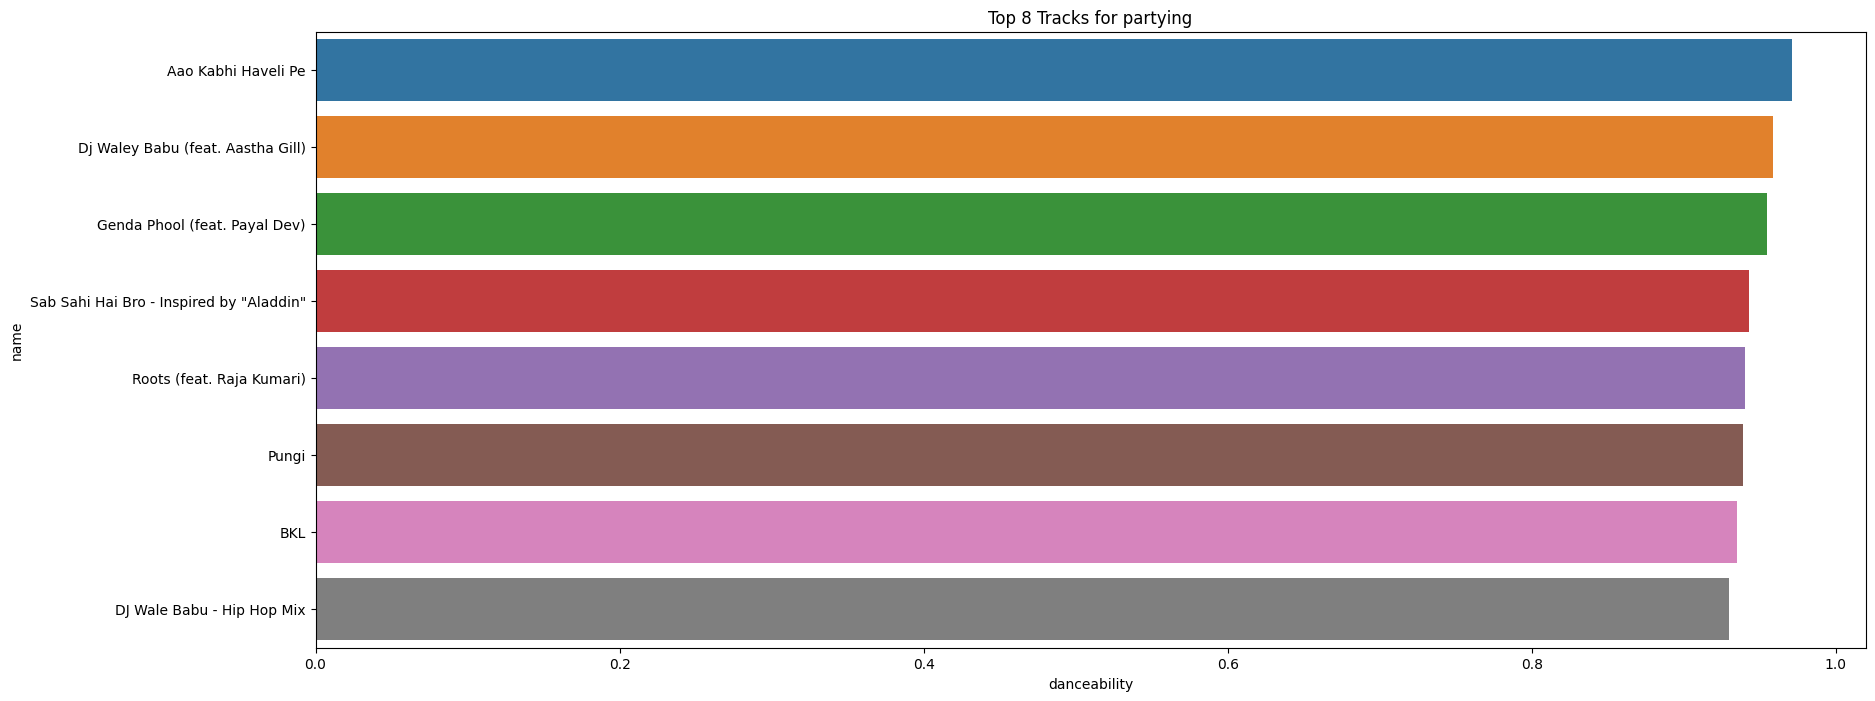

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x="danceability",y="name",data=mostdance)
plt.title("Top 8 Tracks for partying")
plt.show()

In [ ]:
# Top 10 most instrumental songs
mostinstr=newdf[["instrumentalness","name","Singer"]].sort_values(by="instrumentalness",ascending=False)[:10]
mostinstr

,instrumentalness,name,Singer
467,0.967,Kanaka Nu Lag Gaya,Asha Bhosle
254,0.908,Jashn-E-Bahaaraa - Instrumental - Flute,AR Rahman
1148,0.907,Aaj Phir Jeene Ki Tamanna Hai,Lata Mangeshwar
1323,0.867,Din Dhal Jaye Haye,Mohammad Rafi
366,0.861,Theher Ja,Armaan Malik
1184,0.837,Har Dil Jo Pyar Karega,Mahendra Kapoor
1319,0.822,Aadmi Musafir Hai - Happy,Mohammad Rafi
265,0.819,Meera's Poem,Arijit Singh
1563,0.797,Andhadhun Title Track,Raftaar
1141,0.786,Jo Wada Kiya Woh Nibhana Padega - Happy,Lata Mangeshwar


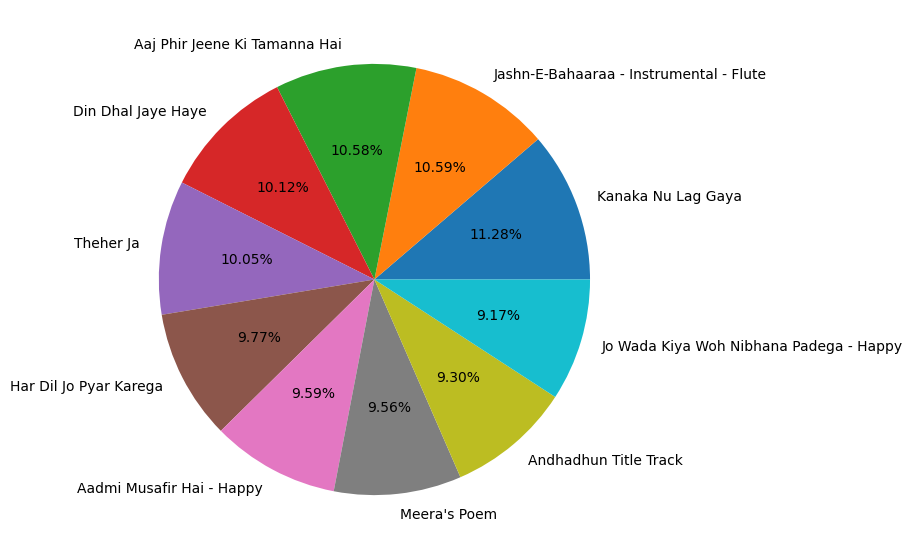

In [ ]:
plt.figure(figsize=(13,7))
plt.pie(x="instrumentalness",data=mostinstr,autopct='%1.2f%%',labels=mostinstr.name)
plt.show()

In [ ]:
#Top 5 happiest songs
df1=newdf.name.unique()
mosthappy=newdf[["valence","name","Singer"]].sort_values(by="valence",ascending=False)[:5]
mosthappy


,valence,name,Singer
1514,0.970,"Chor Bazari (From ""Love Aaj Kal "")",Pritam
1383,0.967,Khwab Dekhe Sexy Lady,Monali Thakur
202,0.966,Maar Sutiya,Anu Malik
1060,0.964,O Humdum Suniyo Re,KK
429,0.963,Bachke Rehna Re Baba - Pukar / Soundtrack Version,Asha Bhosle


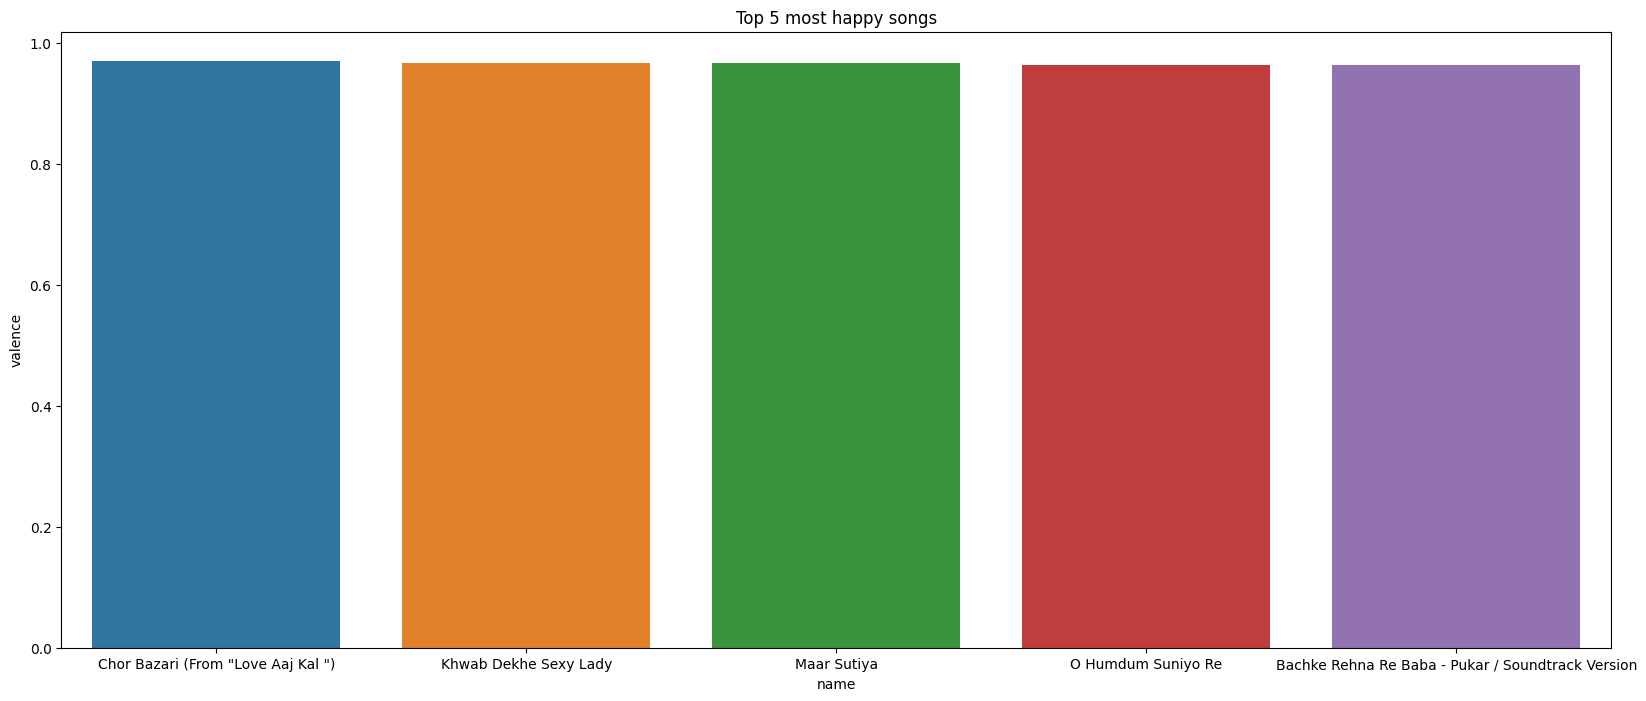

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x="name",y="valence",data=mosthappy)
plt.title("Top 5 most happy songs")
plt.show()